<a href="https://colab.research.google.com/github/Alan240124/Alan/blob/main/Atividade_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as up


In [ ]:
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        # Retorna a amostra e o rótulo correspondente
        return self.dados[idx], self.labels[idx]


In [ ]:
# Dados de exemplo
dados = torch.randn(100, 3)  # 100 amostras, 3 características cada
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

In [ ]:
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
for dados, labels in dataloader:
    # Aqui você pode processar os dados, como treinar o modelo
    print(dados.shape, labels.shape)  # Exemplo: exibir o tamanho dos batches

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

# Definindo o Dataset personalizado
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        return self.dados[idx], self.labels[idx]

# Criando um dataset de exemplo
dados = torch.randn(100, 3)  # 100 amostras, cada uma com 3 características
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

# Criando o DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Iterando sobre o DataLoader
for dados, labels in dataloader:
    print(dados.shape, labels.shape)

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
class HeartSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_names = sorted(os.listdir(image_dir))  # Listando nomes de arquivos

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega imagem e máscara usando os nomes de arquivos
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.image_names[idx].replace(".png", "_mask.png"))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplicando transformações
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Definindo transformações
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Tamanho padrão
    transforms.ToTensor()
])

# Criando o dataset
dataset = HeartSegmentationDataset(image_dir="/content/drive/MyDrive/DataSet/images", mask_dir="/content/drive/MyDrive/DataSet/masks", transform=transform)

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# Exemplo de definição de um Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.images = os.listdir(images_dir)  # Lista de arquivos de imagem
        self.masks = os.listdir(masks_dir)    # Lista de arquivos de máscara

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Carregando a imagem e a máscara
        img_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.masks_dir, self.masks[idx])

        image = Image.open(img_path)
        mask = Image.open(mask_path)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Diretórios das imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet/images/'
masks_dir = '/content/drive/MyDrive/DataSet/masks/'

# Transformações (opcional)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Inicializando o dataset
dataset = CustomDataset(images_dir, masks_dir, transform=transform)

# Criando o DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterando sobre o dataloader
for images, masks in dataloader:
    print(images.shape)  # Exemplo: tamanho do batch de imagens
    print(masks.shape)   # Exemplo: tamanho do batch de máscaras


torch.Size([9, 1, 256, 256])
torch.Size([9, 1, 256, 256])


torch.Size([1, 256, 216])


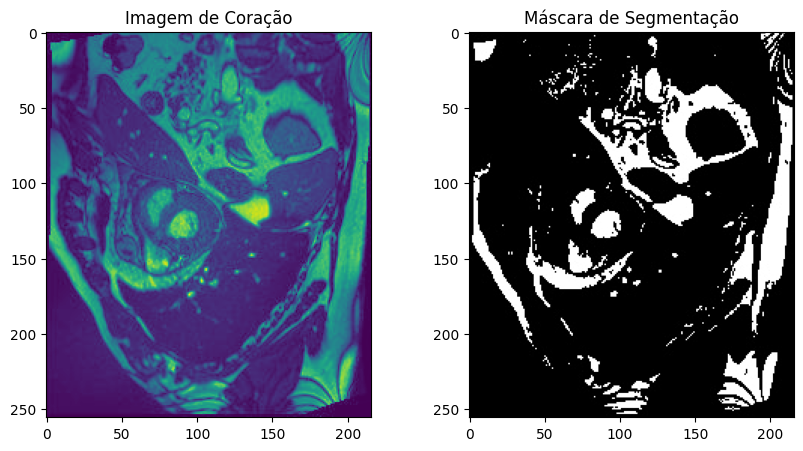

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# Carregando a imagem
image_path = '/content/drive/MyDrive/DataSet/images/image.0001.jpg'
image = Image.open(image_path)

# Convertendo a imagem para tensor
transform = transforms.ToTensor()
image_tensor = transform(image)

# Verificando a forma do tensor
print(image_tensor.shape)  # Deve ser [canais, altura, largura]

# Exibindo a imagem e a máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Garantindo que o tensor está em formato HWC para exibição
ax[0].imshow(image_tensor.permute(1, 2, 0).numpy())  # Convertendo para formato HWC
ax[0].set_title("Imagem de Coração")

# Carregando a máscara (ajuste o caminho conforme necessário)
mask_path = '/content/drive/MyDrive/DataSet/masks/mask_image.0001.jpg'  # Substitua pelo caminho da sua máscara
mask = Image.open(mask_path).convert('L')  # Converte para escala de cinza
mask_tensor = transform(mask)  # Convertendo a máscara para tensor

# Exibindo a máscara em escala de cinza
ax[1].imshow(mask_tensor.squeeze(), cmap="gray")  # Exibindo a máscara
ax[1].set_title("Máscara de Segmentação")

plt.show()


Pastas 'images' e 'masks' verificadas/criadas com sucesso.


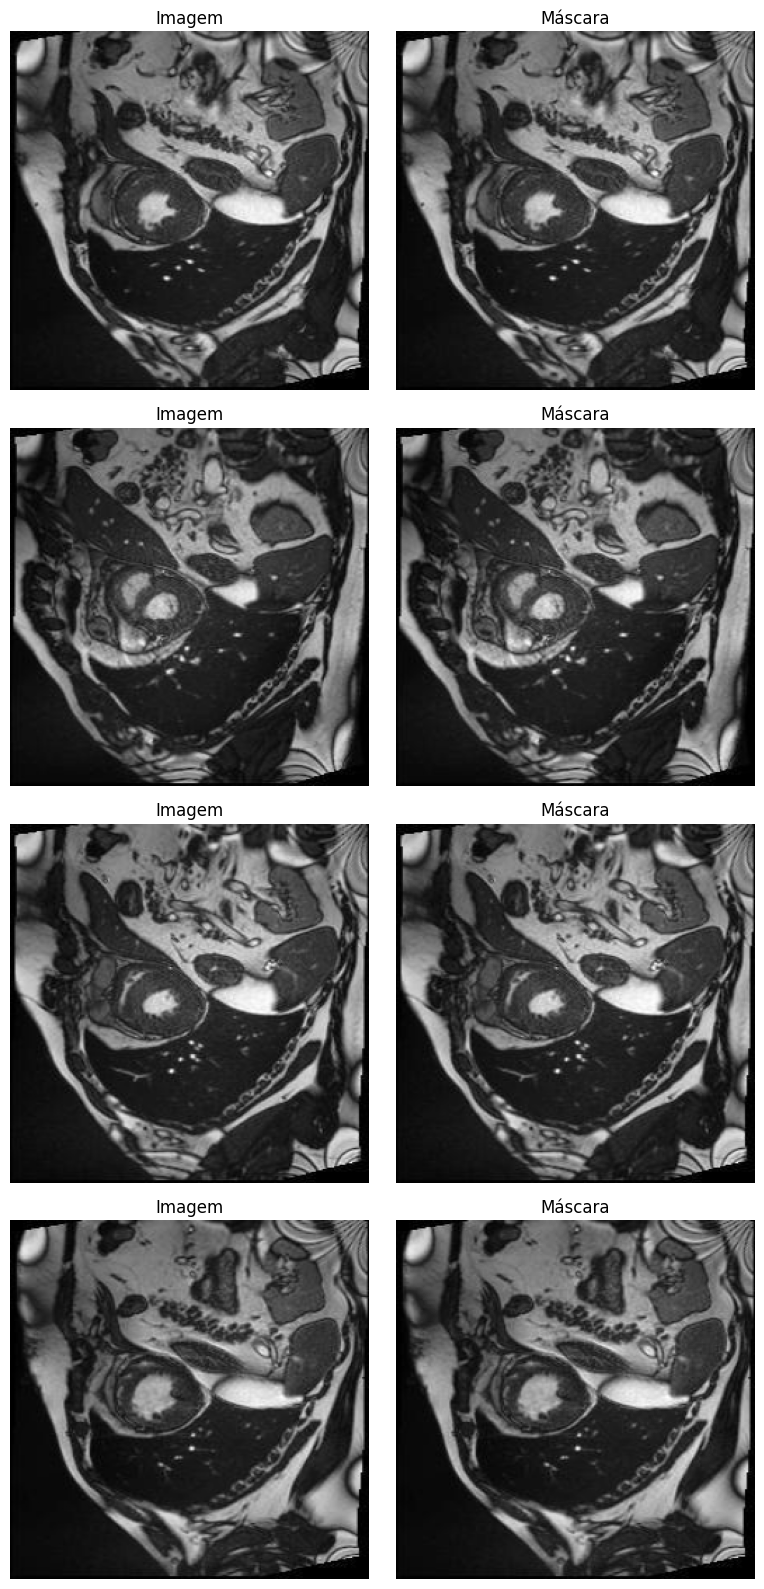

In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Caminho base do dataset de segmentação do coração
dataset_path = "/content/drive/MyDrive/Dataset2"


# Função para criar as pastas, caso não existam
def criar_pastas_dataset():
    os.makedirs(os.path.join(dataset_path, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, "masks"), exist_ok=True)
    print("Pastas 'images' e 'masks' verificadas/criadas com sucesso.")

# Chama a função para garantir que as pastas existam
criar_pastas_dataset()

# Define uma classe personalizada para o dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_names = os.listdir(images_dir)  # lista de imagens

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega a imagem e a máscara usando o índice
        image_path = os.path.join(self.images_dir, self.image_names[idx])
        mask_path = os.path.join(self.masks_dir, self.image_names[idx])

        # Abre as imagens como objetos PIL
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplica as transformações, se houver
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask



# Define o caminho para as pastas de imagens e máscaras
images_dir = os.path.join(dataset_path, "images")
masks_dir = os.path.join(dataset_path, "masks")

# Transforma de exemplo (normalização e redimensionamento)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Cria o DataLoader
heart_dataset = HeartSegmentationDataset(images_dir=images_dir, masks_dir=masks_dir, transform=transform)
dataloader = DataLoader(heart_dataset, batch_size=4, shuffle=True)



# Função para exibir um batch de imagens e máscaras
def visualizar_batch(dataloader):
    images, masks = next(iter(dataloader))  # Obtem um batch
    batch_size = images.size(0)
    epochs=10
    fig, axes = plt.subplots(batch_size, 2, figsize=(8, 4 * batch_size))
    for i in range(batch_size):
        # Converte a imagem e máscara para numpy para exibição
        image_np = images[i].permute(1, 2, 0).numpy()  # rearranja canais para [H, W, C]
        mask_np = masks[i].squeeze().numpy()           # remove dimensões extras

        # Exibe a imagem e a máscara
        axes[i, 0].imshow(image_np)
        axes[i, 0].set_title("Imagem")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(mask_np, cmap="gray")
        axes[i, 1].set_title("Máscara")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Chama a função para exibir um batch de imagens e máscaras
visualizar_batch(dataloader)

In [ ]:
import os

masks_dir = '/content/drive/MyDrive/DataSet/masks/'  # Ajuste conforme necessário
print("Arquivos na pasta de máscaras:", os.listdir(masks_dir))


Arquivos na pasta de máscaras: ['mask_image.0004.jpg', 'mask_image.0002.jpg', 'mask_image.0007.jpg', 'mask_image.0001.jpg', 'mask_image.0009.jpg', 'mask_image.0008.jpg', 'mask_image.0003.jpg', 'mask_image.0005.jpg', 'mask_image.0006.jpg', '.ipynb_checkpoints']


In [27]:
import os
import cv2
import glob as gb
from tqdm import tqdm

TRAIN_PATH = '/content/drive/MyDrive/DataSet'
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1
X_train = []
Y_train = []
X_test = []
Y_test = []



# Loop para carregar as imagens e máscaras
for folder in tqdm(os.listdir(TRAIN_PATH)):
    # Caminho para imagens
    image_files = gb.glob(os.path.join(TRAIN_PATH, folder, 'image', '*.jpg'))
    for file in image_files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        X_train.append(img)  # Não precisa converter para lista
        X_test.append(img)
    # Caminho para máscaras
    mask_files = gb.glob(os.path.join(TRAIN_PATH, folder, 'mask', '*.jpg'))
    for file in mask_files:
        mask = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Lê a máscara em escala de cinza
        mask = cv2.resize(masks, (IMG_WIDTH, IMG_HEIGHT))
        Y_train.append(masks)  # Não precisa converter para lista
        Y_test.append(masks)

# Se você precisa que os dados sejam arrays NumPy
import numpy as np
X_train = np.array(X_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)  # Ajuste as dimensões
Y_train = np.array(Y_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)  # Ajuste as dimensões
X_test = np.array(X_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)  # Ajuste as dimensões
Y_test = np.array(Y_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)  # Ajuste as dimensões
# Verifica as dimensões finais
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de Y_train:", Y_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de Y_test:", Y_test.shape)


100%|██████████| 3/3 [00:00<00:00, 794.98it/s]

Dimensões de X_train: (0, 256, 256, 1)
Dimensões de Y_train: (0, 256, 256, 1)
Dimensões de X_test: (0, 256, 256, 1)
Dimensões de Y_test: (0, 256, 256, 1)


In [26]:
import numpy as np
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from skimage.transform import resize

# Definir os caminhos das imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet/images/*/'
masks_dir = '/content/drive/MyDrive/DataSet/masks/*/*.tif'

# Coletar arquivos de imagem e máscara
database_images_files = glob(images_dir + '*/*')  # Supondo que as imagens estão organizadas por subdiretórios
database_masks_files = glob(masks_dir + '*.tif')

# Verificar a quantidade de classes
n_classes = 2  # Supondo que há apenas duas classes: 'images' e 'masks'

# Número total de arquivos (imagens + máscaras)
n_files = len(database_images_files) + len(database_masks_files)

# Inicializar arrays para labels e imagens
labels = np.zeros((n_files, n_classes))  # (n_files, n_classes)
images = np.zeros((n_files, 100, 100, 3))  # (n_files, 100, 100, 3)

# Inicializar contadores
cont = 0  # Contador global para as imagens
lb = 0  # Label index para a classe

# Processar as imagens (classe 0)
for fc in tqdm(database_images_files):
    labels[cont, 0] = 1  # Classe 0 para as imagens
    im = imread(fc)  # Ler a imagem
    image_resized = resize(im, (100, 100, 3))  # Redimensionar a imagem para 100x100x3
    images[cont, :, :, :] = image_resized  # Armazenar a imagem redimensionada
    cont += 1  # Incrementar o contador global

# Processar as máscaras (classe 1)
for fc in tqdm(database_masks_files):
    labels[cont, 1] = 1  # Classe 1 para as máscaras
    im = imread(fc)  # Ler a máscara
    image_resized = resize(im, (100, 100, 3))  # Redimensionar a máscara para 100x100x3
    images[cont, :, :, :] = image_resized  # Armazenar a máscara redimensionada
    cont += 1  # Incrementar o contador global
lb +=1
# Exibir informações finais
print(f"Total de imagens processadas: {cont}")
print(f"Formato de labels: {labels.shape}")
print(f"Formato de imagens: {images.shape}")


0it [00:00, ?it/s]
0it [00:00, ?it/s]

Total de imagens processadas: 0
Formato de labels: (0, 2)
Formato de imagens: (0, 100, 100, 3)


In [ ]:
images.shape

torch.Size([9, 1, 256, 256])

In [ ]:
import numpy as np

# Supondo que X_train e Y_train já foram definidos e preenchidos anteriormente
X_train = np.array(X_train)

# Verifica se X_train tem as dimensões corretas antes de empilhar
if X_train.ndim == 2:  # Se for uma imagem em escala de cinza
    X_train = np.stack((X_train,) * 3, axis=-1)  # Empilha para ter 3 canais (RGB)
elif X_train.ndim == 3 and X_train.shape[2] != 3:  # Se não tiver 3 canais
    raise ValueError("X_train deve ter 2 dimensões (altura, largura) ou 3 dimensões (altura, largura, canais).")

    if X_test.ndim == 2:
        X_test = np.stack((X_test))
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_train.shape)
# Converte Y_train para um array NumPy com tipo correto
Y_train = np.array(Y_train, dtype=np.bool_)  # Use np.bool_ em vez de np.bool
Y_train = Y_train.astype(np.uint8)  # Converte para 0 e 1 se precisar de binário
Y_train = np.expand_dims(Y_train, axis=-1)  # Adiciona uma dimensão para o canal
Y_test = np.array(Y_test, dtype=np.bool_)
Y_test = Y_test.astype(np.uint8)
Y_test = np.expand_dims(Y_test, axis=-1)
print("Dimensões de Y_train:", Y_train.shape)
print("Dimensões de Y_test:", Y_train.shape)

Dimensões de X_train: (0, 256, 256, 1)
Dimensões de X_test: (0, 256, 256, 1)
Dimensões de Y_train: (0, 256, 256, 1, 1, 1)
Dimensões de Y_test: (0, 256, 256, 1, 1, 1)


In [ ]:
X_train=X_train.astype(np.float32)
Y_train=Y_train.astype(np.float32)
X_test=X_test.astype(np.float32)
Y_test=Y_test.astype(np.float32)

In [ ]:
print('Tamanho do Treino: ', X_train.shape)
print('Tamanho do Teste: ', X_test.shape)

Tamanho do Treino:  (0, 256, 256, 1)
Tamanho do Teste:  (0, 256, 256, 1)


In [ ]:
print('Tamanho do Treino: ', X_test.shape)
print('Tamanho do Teste: ', Y_test.shape)

Tamanho do Treino:  (0, 256, 256, 1)
Tamanho do Teste:  (0, 256, 256, 1, 1, 1)


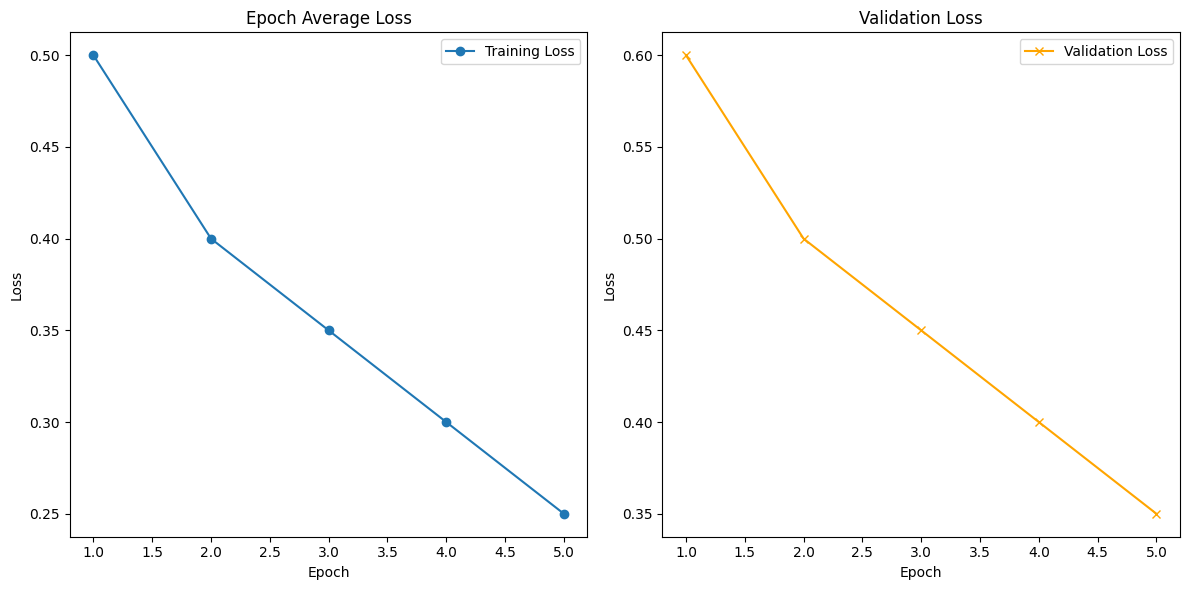

In [ ]:
import matplotlib.pyplot as plt

# Exemplo de inicialização de variáveis
epoch_loss_values = [0.5, 0.4, 0.35, 0.3, 0.25]  # Exemplo de perdas de treinamento por época
losses_validation = [0.6, 0.5, 0.45, 0.4, 0.35]  # Exemplo de perdas de validação
val_interval = 1  # Intervalo de validação (pode ser ajustado conforme necessário)

# Criar a figura para plotar
plt.figure("train", (12, 6))

# Subplot para perda média por época
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x_train = [i + 1 for i in range(len(epoch_loss_values))]
y_train = epoch_loss_values
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(x_train, y_train, marker='o', label='Training Loss')
plt.legend()

# Subplot para perda de validação
plt.subplot(1, 2, 2)
plt.title("Validation Loss")
x_val = [val_interval * (i + 1) for i in range(len(losses_validation))]
y_val = losses_validation
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(x_val, y_val, marker='x', color='orange', label='Validation Loss')
plt.legend()

# Mostrar os gráficos
plt.tight_layout()  # Melhora o layout
plt.show()


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Exemplo de definição de um modelo de rede neural convolucional simples
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 256)  # Ajuste o tamanho conforme necessário
        self.fc2 = nn.Linear(256, 1)  # Saída para segmentação binária

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.ReLU()(self.conv2(x))
        x = x.view(x.size(0), -1)  # Achata a saída
        x = nn.Sigmoid()(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicialização do modelo
model = SimpleCNN()

# Definição da função de perda e do otimizador
criterion = nn.BCELoss()  # Se estiver usando saída binária
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import os
import glob

data_dir = "/content/drive/MyDrive/DataSet"
train_images = sorted(glob.glob(os.path.join(data_dir, "images", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "masks", "*/*.nii")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # 16 train and 4 validation


In [ ]:
import os
import glob

# Defina o diretório onde os dados estão armazenados
data_dir = "/content/drive/MyDrive/DataSet"

# Verifique se o diretório existe
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"O diretório {data_dir} não existe. Verifique o caminho.")

# Carregar e ordenar as imagens e máscaras no formato NIfTI
train_images = sorted(glob.glob(os.path.join(data_dir, "images", "*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "masks", "*.nii")))

# Verifique se foram encontrados arquivos de imagem e máscara
if len(train_images) == 0:
    print(f"Nenhum arquivo de imagem '.nii' encontrado no diretório {os.path.join(data_dir, 'images')}")
if len(train_labels) == 0:
    print(f"Nenhum arquivo de máscara '.nii' encontrado no diretório {os.path.join(data_dir, 'masks')}")

# Certifique-se de que o número de imagens corresponde ao número de máscaras
assert len(train_images) == len(train_labels), (
    f"Número de imagens ({len(train_images)}) não corresponde ao número de máscaras ({len(train_labels)})"
)

# Crie uma lista de dicionários associando cada imagem à sua máscara
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

# Divida os dados em conjuntos de treinamento e validação
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # Aqui consideramos os últimos 4 para validação

# Exibir o número de arquivos de treinamento e validação
print("Número de arquivos de treinamento:", len(train_files))
print("Número de arquivos de validação:", len(val_files))

# Exibir alguns exemplos para verificação
print("\nExemplos de arquivos de treinamento:")
for item in train_files[:3]:  # Mostrar os primeiros 3 exemplos
    print(item)

print("\nExemplos de arquivos de validação:")
for item in val_files[:3]:  # Mostrar os primeiros 3 exemplos de validação (se houver)
    print(item)


Nenhum arquivo de imagem '.nii' encontrado no diretório /content/drive/MyDrive/DataSet/images
Nenhum arquivo de máscara '.nii' encontrado no diretório /content/drive/MyDrive/DataSet/masks
Número de arquivos de treinamento: 0
Número de arquivos de validação: 0

Exemplos de arquivos de treinamento:

Exemplos de arquivos de validação:


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# 1. Definir a classe de dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask

        # Filtrar apenas arquivos de imagem, ignorando arquivos ocultos
        self.image_files = sorted([f for f in os.listdir(images_dir) if not f.startswith('.')])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if not f.startswith('.')])

        # Verificar se o número de imagens e máscaras é o mesmo
        assert len(self.image_files) == len(self.mask_files), "Número de imagens e máscaras deve ser o mesmo!"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara é carregada como escala de cinza (grayscale)

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask

# 2. Definir transformações
transform_image = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # Converte para tensor, mantendo escala de cinza
])

# 3. Criar o dataset
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'
dataset = HeartSegmentationDataset(images_dir, masks_dir, transform_image=transform_image, transform_mask=transform_mask)

# 4. Criar o DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# 5. Iterar sobre o DataLoader
for images, masks in dataloader:
    print(f"Imagens batch size: {images.size()}")
    print(f"Máscaras batch size: {masks.size()}")
    # Loop de treinamento ou validação
    pass


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Imagens batch size: torch.Size([8, 3, 256, 256])
Máscaras batch size: torch.Size([8, 1, 256, 256])
Imagens batch size: torch.Size([1, 3, 256, 256])
Máscaras batch size: torch.Size([1, 1, 256, 256])


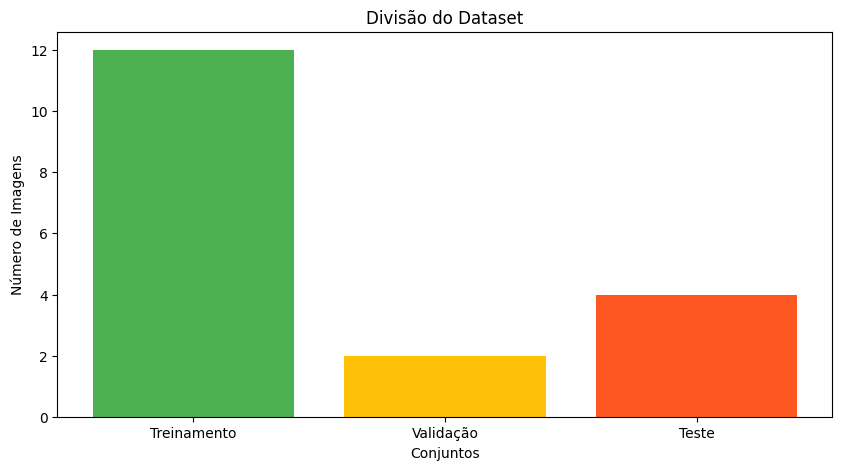

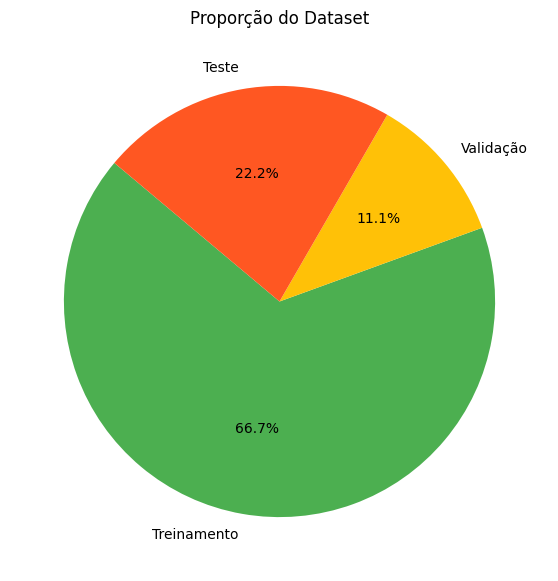

In [ ]:
import matplotlib.pyplot as plt

# Definir tamanhos dos conjuntos
total_images = 18  # Exemplo: dataset com 18 imagens
train_size = int(0.7 * total_images)  # 70% para treinamento
val_size = int(0.15 * total_images)   # 15% para validação
test_size = total_images - train_size - val_size  # 15% para teste

# Dados para os gráficos
sizes = [train_size, val_size, test_size]
labels = ['Treinamento', 'Validação', 'Teste']
colors = ['#4CAF50', '#FFC107', '#FF5722']

# Gráfico de Barras
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Divisão do Dataset')
plt.xlabel('Conjuntos')
plt.ylabel('Número de Imagens')
plt.show()

# Gráfico de Pizza
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporção do Dataset')
plt.show()


Exibindo exemplos de cada conjunto:


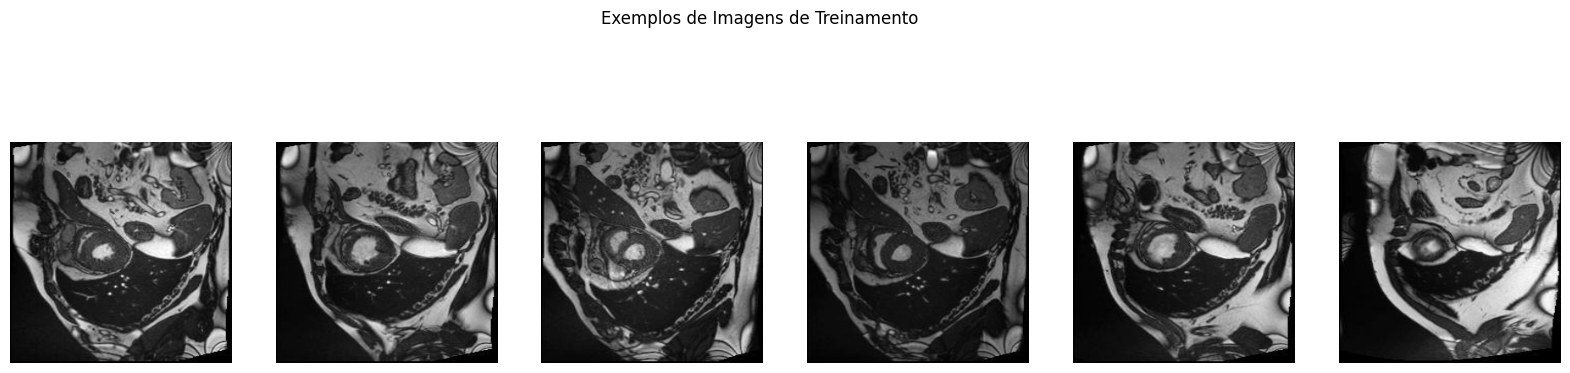

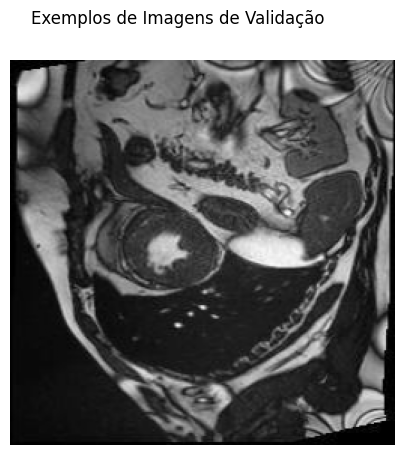

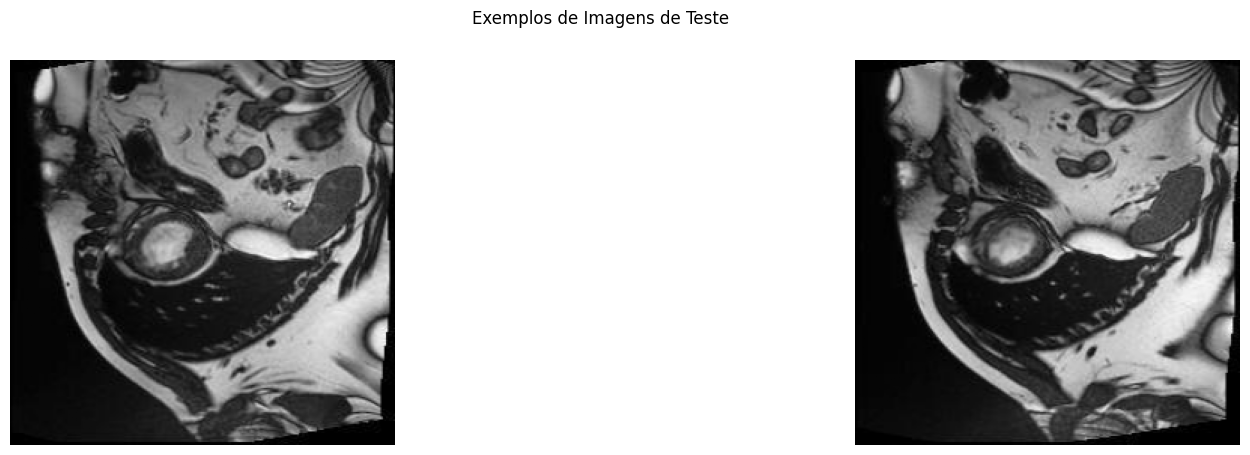

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt

# 1. Criar a classe de dataset personalizada
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        # Filtrar apenas arquivos para evitar subdiretórios
        self.image_files = sorted([f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if os.path.isfile(os.path.join(masks_dir, f))])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask

# 2. Configurar diretórios e transformações
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'

# Transformação para imagens e máscaras
transform_image = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# 3. Criar o dataset e dividir em treino, validação e teste
dataset = HeartSegmentationDataset(images_dir, masks_dir, transform_image=transform_image, transform_mask=transform_mask)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 4. Criar DataLoaders para cada conjunto
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# 5. Exibir alguns exemplos de dados
def show_samples(dataloader, title):
    images, masks = next(iter(dataloader))
    num_images = images.size(0)  # Número real de imagens no lote

    # Cria uma figura com o número correto de subplots
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    fig.suptitle(title)

    # Se num_images é 1, 'axes' não será uma lista, então ajustamos para ser iterável
    if num_images == 1:
        axes = [axes]

    for i in range(num_images):
        img = images[i].permute(1, 2, 0)  # Rearrange para exibição no matplotlib
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Exibir exemplos dos conjuntos
print("Exibindo exemplos de cada conjunto:")
show_samples(train_loader, "Exemplos de Imagens de Treinamento")
show_samples(val_loader, "Exemplos de Imagens de Validação")
show_samples(test_loader, "Exemplos de Imagens de Teste")


In [ ]:
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        self.image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

        # Verificar se o número de imagens e máscaras corresponde
        if len(self.image_files) != len(self.mask_files):
            raise ValueError(f"Número de imagens ({len(self.image_files)}) e máscaras ({len(self.mask_files)}) não correspondem.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        # Verifica se o caminho da máscara é um arquivo
        if not os.path.isfile(mask_path):
            raise FileNotFoundError(f"Máscara não encontrada: {mask_path}")

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask





In [ ]:
# importar as bibliotecas necessárias
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# definir a classe Dataset
class data_set(Dataset):
    def __init__(self):
        numbers = list(range(0, 100, 1))
        self.data = numbers

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


dataset = data_set()

# implementação do dataloader no conjunto de dados e impressão por lote

dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
for i, batch in enumerate(dataloader):
    print(i, batch)

0 tensor([40, 41, 67, 14, 78, 61, 85, 32, 98, 34])
1 tensor([57, 12,  5, 25, 18, 46, 92, 81, 93, 58])
2 tensor([53, 38,  6, 59, 60, 39, 75, 99, 31, 62])
3 tensor([71, 42, 28, 63,  7, 95, 65, 80, 87, 56])
4 tensor([ 8, 79, 77, 30, 83, 43, 23, 73, 89, 16])
5 tensor([66, 68, 55, 26, 37, 17, 19, 47, 72, 49])
6 tensor([50, 86, 45, 44, 88, 94, 22, 74,  1, 11])
7 tensor([10, 36,  0, 15, 29, 70, 27,  2, 35, 54])
8 tensor([69, 51, 13, 21, 97, 91, 52, 76, 90, 84])
9 tensor([48, 82, 24, 33, 20, 96,  3,  4,  9, 64])


In [ ]:

# importar as bibliotecas necessárias
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import seaborn as sns
from torch.utils.data import TensorDataset

# Definição do conjunto de dados constituído por
# duas colunas do conjunto de dados da íris
iris = sns.load_dataset('iris')
petal_length = torch.tensor(iris['petal_length'])
petal_width = torch.tensor(iris['petal_width'])
dataset = TensorDataset(petal_length, petal_width)

# implementando o dataloader no conjunto de dados
# e impressão por lote
dataloader = DataLoader(dataset,
                        batch_size=5,
                        shuffle=True)

for i in dataloader:
    print(i)

[tensor([1.4000, 5.1000, 1.3000, 4.3000, 1.4000], dtype=torch.float64), tensor([0.2000, 1.9000, 0.2000, 1.3000, 0.1000], dtype=torch.float64)]
[tensor([4.5000, 6.4000, 1.5000, 1.3000, 1.5000], dtype=torch.float64), tensor([1.5000, 2.0000, 0.1000, 0.4000, 0.2000], dtype=torch.float64)]
[tensor([4.7000, 4.4000, 1.6000, 4.3000, 6.7000], dtype=torch.float64), tensor([1.4000, 1.4000, 0.2000, 1.3000, 2.0000], dtype=torch.float64)]
[tensor([5.1000, 3.8000, 5.5000, 4.0000, 5.7000], dtype=torch.float64), tensor([2.4000, 1.1000, 1.8000, 1.3000, 2.3000], dtype=torch.float64)]
[tensor([1.5000, 4.8000, 1.7000, 4.7000, 4.0000], dtype=torch.float64), tensor([0.3000, 1.8000, 0.5000, 1.6000, 1.0000], dtype=torch.float64)]
[tensor([6.1000, 4.7000, 5.6000, 6.1000, 5.4000], dtype=torch.float64), tensor([1.9000, 1.4000, 2.4000, 2.5000, 2.1000], dtype=torch.float64)]
[tensor([5.0000, 4.5000, 1.3000, 4.2000, 1.4000], dtype=torch.float64), tensor([1.7000, 1.5000, 0.3000, 1.3000, 0.3000], dtype=torch.float64)]

In [ ]:
import os
import glob

data_dir = "/content/drive/MyDrive/DataSet"

# Acesse as imagens e os rótulos
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*/*.nii")))

# Corrigido: use 'for' ao invés de 'para' e 'in' ao invés de 'em' (em português)
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

# Divide os arquivos em treinamento e validação
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # 16 train e 4 arquivos de validação

train_files  # Para exibir os arquivos de treino




[]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F



# Definição da CNN
class HeartSegmentationCNN(nn.Module):
    def __init__(self):
        super(HeartSegmentationCNN, self).__init__()

        # Camada convolucional 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Camadas de pooling
        self.pool = nn.MaxPool2d(2, 2)

        # Camada totalmente conectada (para segmentação)
        self.conv_out = nn.Conv2d(64, 1, kernel_size=1)  # A última camada deve ter 1 saída (máscara binária)

    def forward(self, x):
        # Passando pelas camadas convolucionais + ReLU + Pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Segmentação final com a camada convolucional de saída
        x = torch.sigmoid(self.conv_out(x))  # Aplique Sigmoid para obter valores de probabilidade entre 0 e 1

        return x


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Input

# Criar o modelo Sequential com forma de entrada definida
model = Sequential([
    Input(shape=(256, 256, 3)),  # Defina a forma de entrada, ajuste conforme necessário
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Agora, o modelo está construído e pronto para compilar
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Exibir o resumo do modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      66,064,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,066,698 (252.02 MB)

 Trainable params: 66,066,698 (252.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
model.compile(
    loss=keras.losses.categorical_crossentropy,  # Função de perda para classificação categórica
    optimizer=keras.optimizers.SGD(0.000001),    # Otimizador SGD com uma taxa de aprendizado muito baixa
    metrics=['accuracy']                         # Métrica de acurácia
)


In [ ]:
# Instanciar o modelo
model = HeartSegmentationCNN()

# Definir o otimizador e a função de perda
criterion = nn.BCELoss()  # Função de perda para segmentação binária
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Definir dispositivo (GPU se disponível)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Função de treinamento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.train()  # Colocar o modelo em modo de treinamento

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            # Limpar gradientes
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            outputs = outputs.squeeze(1)  # Remover dimensão extra da saída
            loss = criterion(outputs, masks)

            # Backward pass e otimização
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Exibir estatísticas por época
        print(f"Época {epoch+1}/{num_epochs}, Perda: {running_loss/len(train_loader)}")

        # Validação ao final de cada época (opcional)
        validate_model(model, val_loader, criterion)

    print("Treinamento finalizado!")

# Função de validação (opcional, para acompanhar desempenho em validação)
def validate_model(model, val_loader, criterion):
    model.eval()  # Colocar o modelo em modo de avaliação
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            outputs = outputs.squeeze(1)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    print(f"Perda na validação: {val_loss / len(val_loader)}")
    model.train()  # Voltar ao modo de treinamento após validação


In [ ]:
EPOCHS = 5
BATCH_SIZE = 8

In [ ]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # Upsample para retornar ao tamanho original [256, 256]
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# Exemplo de Dataset, substitua pelo seu próprio dataset
class SeuDatasetDeTreinamento(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        # Retorne a amostra de dados e o rótulo (label)
        return self.dados[idx], self.labels[idx]

# Criar dados fictícios para exemplificação
dados_treino = torch.randn(100, 10)  # 100 amostras, 10 características
labels_treino = torch.randint(0, 2, (100,))  # Rótulos binários (0 ou 1)

dados_val = torch.randn(20, 10)  # 20 amostras de validação
labels_val = torch.randint(0, 2, (20,))

# Criar datasets de treino e validação
train_dataset = SeuDatasetDeTreinamento(dados_treino, labels_treino)
val_dataset = SeuDatasetDeTreinamento(dados_val, labels_val)

# Criar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Definir o modelo, critério e otimizador
model = nn.Sequential(
    nn.Linear(10, 50),  # Ajustar o número de entradas conforme seus dados
    nn.ReLU(),
    nn.Linear(50, 2)    # 2 classes de saída (binário)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Definir a função de treinamento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Modo de treino
        running_loss = 0.0
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validação
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}")

# Treinar o modelo por 10 épocas
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


Epoch [1/10], Loss: 2.8333, Val Loss: 0.6963
Epoch [2/10], Loss: 2.6739, Val Loss: 0.6998
Epoch [3/10], Loss: 2.7044, Val Loss: 0.7044
Epoch [4/10], Loss: 2.6755, Val Loss: 0.7095
Epoch [5/10], Loss: 2.6643, Val Loss: 0.7145
Epoch [6/10], Loss: 2.6349, Val Loss: 0.7181
Epoch [7/10], Loss: 2.5412, Val Loss: 0.7220
Epoch [8/10], Loss: 2.6678, Val Loss: 0.7259
Epoch [9/10], Loss: 2.4834, Val Loss: 0.7295
Epoch [10/10], Loss: 2.5495, Val Loss: 0.7327


In [32]:
import os
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

class ADE20KDataset(Dataset):
    def __init__(self, images_dir, annotations_dir, transforms=None):
        self.images_dir = images_dir
        self.annotations_dir = annotations_dir
        self.transforms = transforms
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(annotations_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_filename = self.image_files[idx]

        img_name = os.path.join(self.images_dir, image_filename)
        image = Image.open(img_name).convert("RGB")

        # Generate the mask filename based on the image filename
        mask_filename = image_filename.replace(".jpg", ".png")
        mask_name = os.path.join(self.annotations_dir, mask_filename)

        mask = Image.open(mask_name)

        if self.transforms:
            image = self.transforms(image)
            mask = self.transforms(mask)

        return image, mask


In [33]:
images.shape

(0, 100, 100, 3)

In [34]:
labels.shape

(0, 2)

In [41]:
import os
import glob

data_dir = "/content/drive/MyDrive/DataSet"
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*/*.nii")))
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:] # 16 train and 4 validation

print(f"Número de imagens de treino: {len(train_files)}")
print(f"Número de imagens de validação: {len(val_files)}")

Número de imagens de treino: 0
Número de imagens de validação: 0


In [42]:
import os
import cv2
import glob
import numpy as np
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

class HeartDataset(Dataset):
    def __init__(self, data_dir, img_size=(256, 256)):
        self.img_size = img_size
        self.image_paths = glob.glob(os.path.join(data_dir, 'images', '*.jpg'))  # Ajuste a extensão se necessário
        self.mask_paths = glob.glob(os.path.join(data_dir, 'masks', '*.jpg'))    # Ajuste a extensão se necessário

        # Verifica se as quantidades de imagens e máscaras correspondem
        assert len(self.image_paths) == len(self.mask_paths), "O número de imagens e máscaras não corresponde."

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        # Carrega a imagem e a máscara
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Redimensiona as imagens e máscaras
        image = cv2.resize(image, self.img_size)
        mask = cv2.resize(mask, self.img_size)

        # Normaliza as imagens (opcional)
        image = image / 255.0
        mask = mask / 255.0  # Se as máscaras forem binárias, você pode optar por normalizar

        return {
            'image': image,
            'label': mask
        }

# Diretório do dataset
data_dir = '/content/drive/MyDrive/DataSet'

# Criação do Dataset e DataLoader
heart_dataset = HeartDataset(data_dir)
dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True)

# Testar o DataLoader
for batch in dataloader:
    images = batch['image']
    labels = batch['label']
    print(f"Número de imagens no batch: {images.shape[0]}")
    print(f"Dimensões das imagens: {images.shape}")
    print(f"Dimensões das máscaras: {labels.shape}")
    break  # Remova esta linha para iterar sobre todos os batches


Número de imagens no batch: 8
Dimensões das imagens: torch.Size([8, 256, 256])
Dimensões das máscaras: torch.Size([8, 256, 256])


In [43]:
images.shape

torch.Size([8, 256, 256])

In [44]:
labels.shape

torch.Size([8, 256, 256])

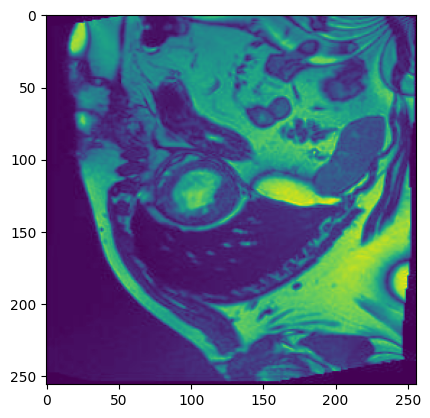

In [47]:
plt.imshow(images[7,:, :])

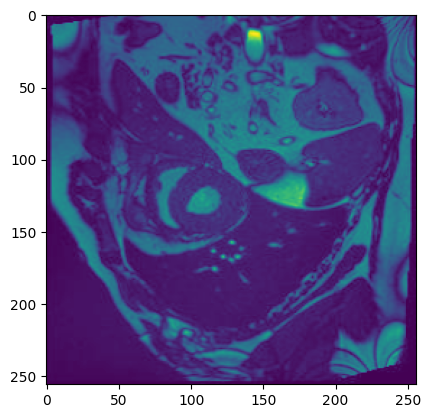

In [55]:
plt.imshow(images[2,:, :])

In [58]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from glob import glob
from tqdm import tqdm

# Definir os caminhos das bases de dados (imagens e máscaras)
class HeartDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_files = sorted(glob(os.path.join(images_dir, "*.jpg")))  # Ajuste a extensão se necessário
        self.mask_files = sorted(glob(os.path.join(masks_dir, "*.jpg")))    # Ajuste a extensão se necessário

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_files[idx], cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(self.mask_files[idx], cv2.IMREAD_GRAYSCALE)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return {"image": image, "mask": mask}

# Definir os diretórios das imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'

# Definir transformações
train_transforms = transforms.Compose([
    transforms.ToTensor(),  # Converte a imagem para um tensor
    transforms.Resize((256, 256)),  # Redimensiona as imagens
])

# Criar dataset e dataloader
heart_dataset = HeartDataset(images_dir, masks_dir, transform=train_transforms)
dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True, num_workers=4)

# Verificar o número de imagens e máscaras
print(f"Número de imagens: {len(heart_dataset)}")

# Exemplo de iteração sobre o DataLoader
for batch in tqdm(dataloader):
    images = batch['image']
    masks = batch['mask']
    print(f"Batch de imagens: {images.shape}, Batch de máscaras: {masks.shape}")
    break  # Apenas para evitar um loop infinito durante a visualização


Número de imagens: 9


  0%|          | 0/2 [00:00<?, ?it/s]

Batch de imagens: torch.Size([8, 1, 256, 256]), Batch de máscaras: torch.Size([8, 1, 256, 256])


In [68]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from glob import glob
from tqdm import tqdm
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Definir a classe do Dataset
class HeartDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform

        # Carregar todos os arquivos de imagem e máscara
        self.image_files = sorted(glob(os.path.join(images_dir, "*.jpg")))  # Ajuste a extensão conforme necessário
        self.mask_files = sorted(glob(os.path.join(masks_dir, "*.jpg")))    # Ajuste a extensão conforme necessário

        # Verificar se o número de imagens e máscaras é consistente
        assert len(self.image_files) == len(self.mask_files), "Número de imagens e máscaras não correspondem"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Carregar a imagem e a máscara
        image = cv2.imread(self.image_files[idx], cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza
        mask = cv2.imread(self.mask_files[idx], cv2.IMREAD_GRAYSCALE)    # Lê a máscara em escala de cinza

        # Binarizar a máscara
        _, mask = cv2.threshold(mask, 127, 1, cv2.THRESH_BINARY)  # Ajuste o threshold conforme necessário

        # Adicionar a dimensão de canal (C = 1 para imagens em escala de cinza)
        image = np.expand_dims(image, axis=-1)  # Transformar para (H, W, 1)
        mask = np.expand_dims(mask, axis=-1)    # Transformar para (H, W, 1)

        # Verificar se existe transformação
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return {"image": image, "mask": mask}

# Definir os diretórios das imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'

# Definir transformações
train_transforms = transforms.Compose([
    transforms.ToPILImage(),  # Converte a imagem de NumPy para PIL para aplicar transformações
    transforms.Resize((256, 256)),  # Redimensiona as imagens
    transforms.ToTensor(),  # Converte a imagem para tensor
])

# Criar dataset e dataloader
heart_dataset = HeartDataset(images_dir, masks_dir, transform=train_transforms)
dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True, num_workers=4)

# Definir dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definir seu modelo aqui (exemplo simples)
class SimpleUNet(nn.Module):  # Exemplo de definição de um modelo
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 1, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        return x

# Criar a instância do modelo
model = SimpleUNet()  # Substitua por seu modelo real
model.to(device)  # Mova o modelo para o dispositivo

# Inicialização de métricas
def calculate_metrics(y_true, y_pred):
    # Flatten para 1D
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Cálculo do Dice Coefficient
    intersection = np.sum(y_true * y_pred)
    dice = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-8)  # Adicionando epsilon para evitar divisão por zero

    # Cálculo do IoU
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / (union + 1e-8)  # Adicionando epsilon para evitar divisão por zero

    return accuracy, precision, recall, f1, dice, iou

# Iteração sobre o DataLoader para calcular métricas
all_metrics = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "dice": [],
    "iou": []
}

# Verificar o número de imagens e máscaras
print(f"Número de imagens: {len(heart_dataset)}")

for batch in tqdm(dataloader):
    images = batch['image'].to(device)
    masks = batch['mask'].to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(images)

        # Convertendo as saídas para binárias, caso seja segmentação binária
        predictions = torch.sigmoid(outputs) > 0.5
        true_labels = masks > 0.5

        # Calcular métricas
        accuracy, precision, recall, f1, dice, iou = calculate_metrics(true_labels.cpu().numpy(), predictions.cpu().numpy())

        # Armazenar as métricas
        all_metrics["accuracy"].append(accuracy)
        all_metrics["precision"].append(precision)
        all_metrics["recall"].append(recall)
        all_metrics["f1"].append(f1)
        all_metrics["dice"].append(dice)
        all_metrics["iou"].append(iou)

# Calcular a média das métricas
avg_metrics = {metric: np.mean(values) for metric, values in all_metrics.items()}

# Exibir as métricas médias
print("Métricas de Desempenho:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Número de imagens: 9


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 50%|█████     | 1/2 [00:01<00:01,  1.05s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

Métricas de Desempenho:
accuracy: 1.0000
precision: 0.0000
recall: 0.0000
f1: 0.0000
dice: 0.0000
iou: 0.0000


In [69]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from glob import glob
from tqdm import tqdm
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Definir a classe do Dataset
class HeartDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform

        # Carregar todos os arquivos de imagem e máscara
        self.image_files = sorted(glob(os.path.join(images_dir, "*.jpg")))  # Ajuste a extensão conforme necessário
        self.mask_files = sorted(glob(os.path.join(masks_dir, "*.jpg")))    # Ajuste a extensão conforme necessário

        # Verificar se o número de imagens e máscaras é consistente
        assert len(self.image_files) == len(self.mask_files) == 9, "Número de imagens e máscaras deve ser 9."

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Carregar a imagem e a máscara
        image = cv2.imread(self.image_files[idx], cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza
        mask = cv2.imread(self.mask_files[idx], cv2.IMREAD_GRAYSCALE)    # Lê a máscara em escala de cinza

        # Binarizar a máscara
        _, mask = cv2.threshold(mask, 127, 1, cv2.THRESH_BINARY)  # Ajuste o threshold conforme necessário

        # Adicionar a dimensão de canal (C = 1 para imagens em escala de cinza)
        image = np.expand_dims(image, axis=-1)  # Transformar para (H, W, 1)
        mask = np.expand_dims(mask, axis=-1)    # Transformar para (H, W, 1)

        # Verificar se existe transformação
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return {"image": image, "mask": mask}

# Definir os diretórios das imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'

# Definir transformações
train_transforms = transforms.Compose([
    transforms.ToPILImage(),  # Converte a imagem de NumPy para PIL para aplicar transformações
    transforms.Resize((256, 256)),  # Redimensiona as imagens
    transforms.ToTensor(),  # Converte a imagem para tensor
])

# Criar dataset e dataloader
heart_dataset = HeartDataset(images_dir, masks_dir, transform=train_transforms)
dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True, num_workers=0)  # Ajuste num_workers conforme necessário

# Definir dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Supondo que você tenha um modelo definido
class YourModel(torch.nn.Module):  # Exemplo de definição de modelo
    def __init__(self):
        super(YourModel, self).__init__()
        # Defina as camadas do seu modelo aqui

    def forward(self, x):
        # Defina a passagem para frente aqui
        return x

model = YourModel()  # Instancie seu modelo
model.to(device)  # Mova o modelo para o dispositivo

# Inicialização de métricas
def calculate_metrics(y_true, y_pred):
    # Flatten para 1D
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Cálculo do Dice Coefficient
    intersection = np.sum(y_true * y_pred)
    dice = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-8)  # Adicionando epsilon para evitar divisão por zero

    # Cálculo do IoU
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / (union + 1e-8)  # Adicionando epsilon para evitar divisão por zero

    return accuracy, precision, recall, f1, dice, iou

# Iteração sobre o DataLoader para calcular métricas
all_metrics = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "dice": [],
    "iou": []
}

# Verificar o número de imagens e máscaras
print(f"Número de imagens: {len(heart_dataset)}")

for batch in tqdm(dataloader):
    images = batch['image'].to(device)
    masks = batch['mask'].to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(images)

        # Convertendo as saídas para binárias, caso seja segmentação binária
        predictions = torch.sigmoid(outputs) > 0.5
        true_labels = masks > 0.5

        # Calcular métricas
        accuracy, precision, recall, f1, dice, iou = calculate_metrics(true_labels.cpu().numpy(), predictions.cpu().numpy())

        # Armazenar as métricas
        all_metrics["accuracy"].append(accuracy)
        all_metrics["precision"].append(precision)
        all_metrics["recall"].append(recall)
        all_metrics["f1"].append(f1)
        all_metrics["dice"].append(dice)
        all_metrics["iou"].append(iou)

# Calcular a média das métricas
avg_metrics = {metric: np.mean(values) for metric, values in all_metrics.items()}

# Exibir as métricas médias
print("Métricas de Desempenho:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.4f}")


Número de imagens: 9


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 50%|█████     | 1/2 [00:02<00:02,  2.78s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

Métricas de Desempenho:
accuracy: 0.0191
precision: 0.0000
recall: 0.0000
f1: 0.0000
dice: 0.0000
iou: 0.0000


In [70]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from glob import glob
from tqdm import tqdm
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Definir a classe do Dataset
class HeartDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform

        # Carregar todos os arquivos de imagem e máscara
        self.image_files = sorted(glob(os.path.join(images_dir, "*.jpg")))  # Ajuste a extensão se necessário
        self.mask_files = sorted(glob(os.path.join(masks_dir, "*.jpg")))    # Ajuste a extensão se necessário

        # Verificar se o número de imagens e máscaras é consistente
        assert len(self.image_files) == len(self.mask_files), "Número de imagens e máscaras não correspondem"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Carregar a imagem e a máscara
        image = cv2.imread(self.image_files[idx], cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza
        mask = cv2.imread(self.mask_files[idx], cv2.IMREAD_GRAYSCALE)    # Lê a máscara em escala de cinza

        # Binarizar a máscara
        _, mask = cv2.threshold(mask, 127, 1, cv2.THRESH_BINARY)  # Ajuste o threshold conforme necessário

        # Adicionar a dimensão de canal (C = 1 para imagens em escala de cinza)
        image = np.expand_dims(image, axis=-1)  # Transformar para (H, W, 1)
        mask = np.expand_dims(mask, axis=-1)    # Transformar para (H, W, 1)

        # Verificar se existe transformação
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return {"image": image, "mask": mask}

# Definir os diretórios das imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'

# Definir transformações
train_transforms = transforms.Compose([
    transforms.ToPILImage(),  # Converte a imagem de NumPy para PIL para aplicar transformações
    transforms.Resize((256, 256)),  # Redimensiona as imagens
    transforms.ToTensor(),  # Converte a imagem para tensor
])

# Criar dataset e dataloader
heart_dataset = HeartDataset(images_dir, masks_dir, transform=train_transforms)
dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True, num_workers=4)

# Definir dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Supondo que você tenha um modelo definido
class YourModel(torch.nn.Module):
    def __init__(self):
        super(YourModel, self).__init__()
        # Defina sua arquitetura aqui

    def forward(self, x):
        # Defina a passagem para frente aqui
        return x  # Placeholder, substitua pela saída do seu modelo

model = YourModel()  # Substitua 'YourModel' pela sua definição de modelo
model.to(device)  # Mova o modelo para o dispositivo

# Inicialização de métricas
def calculate_metrics(y_true, y_pred):
    # Flatten para 1D
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Cálculo do Dice Coefficient
    intersection = np.sum(y_true * y_pred)
    dice = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-8)  # Adicionando epsilon para evitar divisão por zero

    # Cálculo do IoU
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / (union + 1e-8)  # Adicionando epsilon para evitar divisão por zero

    return accuracy, precision, recall, f1, dice, iou

# Iteração sobre o DataLoader para calcular métricas
all_metrics = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "dice": [],
    "iou": []
}

# Verificar o número de imagens e máscaras
print(f"Número de imagens: {len(heart_dataset)}")

for batch in tqdm(dataloader):
    images = batch['image'].to(device)
    masks = batch['mask'].to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(images)

        # Convertendo as saídas para binárias, caso seja segmentação binária
        predictions = torch.sigmoid(outputs) > 0.5
        true_labels = masks > 0.5

        # Calcular métricas
        accuracy, precision, recall, f1, dice, iou = calculate_metrics(true_labels.cpu().numpy(), predictions.cpu().numpy())

        # Armazenar as métricas
        all_metrics["accuracy"].append(accuracy)
        all_metrics["precision"].append(precision)
        all_metrics["recall"].append(recall)
        all_metrics["f1"].append(f1)
        all_metrics["dice"].append(dice)
        all_metrics["iou"].append(iou)

# Calcular a média das métricas
avg_metrics = {metric: np.mean(values) for metric, values in all_metrics.items()}

# Exibir as métricas médias
print("Métricas de Desempenho:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Número de imagens: 9


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 50%|█████     | 1/2 [00:00<00:00,  1.17it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

Métricas de Desempenho:
accuracy: 0.0187
precision: 0.0000
recall: 0.0000
f1: 0.0000
dice: 0.0000
iou: 0.0000


In [64]:
import torch.nn as nn

class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()
        # Defina suas camadas aqui
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # Exemplo de camada convolucional
        self.conv2 = nn.Conv2d(16, 1, kernel_size=3, padding=1)  # Camada de saída

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        return x

# Crie uma instância do modelo
model = SimpleUNet()  # Use o nome da classe do seu modelo real aqui


In [65]:
# Definir seu modelo aqui
class SimpleUNet(nn.Module):  # Exemplo de uma definição de modelo
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 1, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        return x

# Criar a instância do modelo
model = SimpleUNet()  # Substitua por seu modelo real
model.to(device)  # Mova o modelo para o dispositivo

# Restante do código para calcular as métricas...


SimpleUNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)